<a href="https://colab.research.google.com/github/Donutson/hackathon-abidjan-data-team-1/blob/main/Conseil_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BeOpenIT Hackathon-Data-IA-ML Team Machine Learnia

#### Les voyages en avion peuvent être stressants en raison de nombreux facteurs qui échappent tout simplement au contrôle des passagers. En tant que passagers, nous voulons miniser ce stress autant que possible. <br>Pour ce faire, nous pouvons utiliser des données antérieures de météo et de l'aeroport de Chicago. 


1.   Predire si le vol arrivera en retard de 15 min où non
2.   Predire si un vol sera annulé ou non
3.   Predire le temps d'arrivée reelle
4.   Predire la date réelle de depart 

### Les données ont été collectées à

1.   http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236
2.   https://www.ncdc.noaa.gov/cdo-web/datasets







## Récupération et traitement des données

In [ ]:
  #librairie utile
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#Acceder à mon dossier sur drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Inserer les donnees telecharges 
airport = pd.read_csv("/content/drive/My Drive/Colab Notebooks/donnees1.csv")
climate = pd.read_csv("/content/drive/My Drive/Colab Notebooks/donnees2.csv")
#Effectuer la fuision entre les données 
climate = pd.read_csv("/content/drive/My Drive/Colab Notebooks/donnees2.csv", parse_dates=["DATE"])
airport = pd.read_csv("/content/drive/My Drive/Colab Notebooks/donnees1.csv", parse_dates=["FL_DATE"])
airport_climate = pd.merge(airport, climate, right_on="DATE", left_on="FL_DATE")
#Restreient les donnees aux villes dont le depart ou l'arrivee est Chicago 
airport_chicago = airport_climate[airport_climate['ORIGIN_CITY_NAME'].str.contains("Chicago") | airport_climate['DEST_CITY_NAME'].str.contains("Chicago") ].copy()
#Creation du dataset
dataset= airport_chicago
list(dataset)

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'TAIL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'Unnamed: 47',
 'STATION',
 'NAME',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'DATE',
 'AWND',
 'PRCP',
 'SNOW',
 'TAVG',
 'TMAX',
 'TMIN']

In [ ]:
#Suppression des variables derivées et non contextuelles après analyse (correlation, logique,....)
dataset.drop(['ORIGIN_STATE_NM', 'ORIGIN_WAC','DEST', 'DEST_STATE_NM', 'DEST_WAC', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIVERTED', 'YEAR', 'TAXI_OUT', 'ARR_DELAY_GROUP','ARR_TIME_BLK',  'DISTANCE_GROUP', 'CARRIER_DELAY',], axis='columns', inplace=True)
dataset.drop(['TAVG', 'ORIGIN_CITY_NAME','DEST_CITY_NAME', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',  'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME','TMIN','STATION','NAME','LATITUDE','LONGITUDE','ELEVATION', 'DATE', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID',  'DEST_AIRPORT_ID', 'ORIGIN'], axis='columns', inplace=True)
dataset.drop(['ARR_DELAY', 'DEP_DELAY'], axis='columns', inplace=True)
dataset.drop(['Unnamed: 47','ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID'], axis='columns', inplace=True)

## Liste des variables retenues pour l'étude

### Après analyse des vrariables, voici les variables retenues

In [ ]:
#Liste des variables retenues
list(dataset)
#[i for i in dataset["SNOW"] ]
#import matplotlib.pyplot as plt
#plt.scatter(dataset["CRS_ARR_TIME"], dataset["ARR_TIME"])

['DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DEL15',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DEL15',
 'CANCELLED',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'WEATHER_DELAY',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX']

## Nettoyage des données gardées

#### Nous allons remplacer les valeurs manquantes par la médiane de la variable concernée

In [ ]:
# Remplacer les NaN en utilisant la médiane
median = dataset['AWND'].median()
dataset['AWND'].fillna(median, inplace=True)

median = dataset['PRCP'].median()
dataset['PRCP'].fillna(median, inplace=True)

median = dataset['SNOW'].median()
dataset['SNOW'].fillna(median, inplace=True)

median = dataset['TMAX'].median()
dataset['TMAX'].fillna(median, inplace=True)

median = dataset['DEP_TIME'].median()
dataset['DEP_TIME'].fillna(median, inplace=True)

median = dataset['CRS_DEP_TIME'].median()
dataset['CRS_DEP_TIME'].fillna(median, inplace=True)

median = dataset['DEP_DEL15'].median()
dataset['DEP_DEL15'].fillna(median, inplace=True)

median = dataset['ARR_TIME'].median()
dataset['ARR_TIME'].fillna(median, inplace=True)

median = dataset['CRS_ARR_TIME'].median()
dataset['CRS_ARR_TIME'].fillna(median, inplace=True)

median = dataset['ARR_DEL15'].median()
dataset['ARR_DEL15'].fillna(median, inplace=True)

median = dataset['CANCELLED'].median()
dataset['CANCELLED'].fillna(median, inplace=True)

median = dataset['AIR_TIME'].median()
dataset['AIR_TIME'].fillna(median, inplace=True)

median = dataset['FLIGHTS'].median()
dataset['FLIGHTS'].fillna(median, inplace=True)

median = dataset['DISTANCE'].median()
dataset['DISTANCE'].fillna(median, inplace=True)

median = dataset['WEATHER_DELAY'].median()
dataset['WEATHER_DELAY'].fillna(median, inplace=True)

dataset

,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DEL15,CANCELLED,AIR_TIME,FLIGHTS,DISTANCE,WEATHER_DELAY,AWND,PRCP,SNOW,TMAX
7,7,1155,1153.0,0.0,1510,1550.0,1.0,0.0,116.0,1.0,740.0,0.0,11.18,0.2,0.0,34
30,7,1020,1016.0,0.0,1043,1029.0,0.0,0.0,48.0,1.0,228.0,0.0,11.18,0.2,0.0,34
31,7,1215,1209.0,0.0,1428,1413.0,0.0,0.0,42.0,1.0,228.0,0.0,11.18,0.2,0.0,34
121,7,700,658.0,0.0,918,859.0,0.0,0.0,39.0,1.0,228.0,0.0,11.18,0.2,0.0,34
181,7,1825,1912.0,1.0,2225,2321.0,1.0,0.0,167.0,1.0,1197.0,0.0,11.18,0.2,0.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516705,2,1139,1256.0,1.0,1415,1541.0,1.0,0.0,128.0,1.0,1041.0,0.0,8.05,0.3,3.0,12
516706,2,620,616.0,0.0,900,848.0,0.0,0.0,126.0,1.0,1041.0,0.0,8.05,0.3,3.0,12
516716,2,1144,1134.0,0.0,1307,1251.0,0.0,0.0,119.0,1.0,773.0,0.0,8.05,0.3,3.0,12
516719,2,600,557.0,0.0,542,605.0,1.0,0.0,23.0,1.0,84.0,0.0,8.05,0.3,3.0,12


### But 1: Predire si le vol arrivera en retard de 15 min où non

In [ ]:
# Choix de la target et des features
y=dataset['ARR_DEL15']
X = dataset.loc[:, dataset.columns != 'ARR_DEL15']
X = X.loc[:, X.columns != 'CANCELLED']
X = X.loc[:, X.columns != 'ARR_TIME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Liste des features retenus
list(X)

['DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DEL15',
 'CRS_ARR_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'WEATHER_DELAY',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX']

In [ ]:
# Librairie des modèles machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Initialisation du dictionnaire des paramètres


In [ ]:
lgb_params = {}

rf_params = {}

xgb_params = {}

dt_params = {}

mlp_params = {}

knn_params = {}

lr_params = {}

### Models and Labels Dictionaries

1.   Élément de liste
2.   Élément de liste



In [ ]:
models = {'dt':DecisionTreeClassifier(**dt_params),
          'rf':RandomForestClassifier(**rf_params), 
          'lgb':lgb.LGBMClassifier(**lgb_params), 
          'xgb':xgb.XGBClassifier(**xgb_params),
          'mlp':MLPClassifier(**mlp_params), 
          'kn':KNeighborsClassifier(**knn_params),  
          'lr':LogisticRegression(**lr_params)}

model_abrv = {'dt':'Decision Tree Classifier', 
              'rf':'Random Forest Classifier', 
              'lgb':'LGBM Classifier', 
              'xgb':'XGB Classifier', 
              'mlp':'MLP Classifier',
              'kn':'K-Nearest Neighbors', 
              'lr':'Logistic Regression', 
              'v':'Voting Classifier: MLP, LGB', 
              'v2':'Voting Classifier 2: KNN, XGB, MLP', 
              'v3':'Voting Classifier 3: XGB, MLP, RF, LR', 
              'v4':'Voting Classifier 4: MLP, XGB'}

### Models Dictionary Needs to be Created Before these Parameter Dictionaries

In [ ]:
v_params = {'estimators':[('mlp', models['mlp']), 
                          ('lgb', models['lgb'])], 
            'voting':'soft'}

v2_params = {'estimators':[('kn', models['kn']), 
                           ('xgb', models['xgb']), 
                           ('mlp', models['mlp'])], 
             'voting':'soft'}

v3_params = {'estimators':[('xgb', models['xgb']),
                           ('mlp', models['mlp']),
                           ('rf', models['rf']), 
                           ('lr', models['lr'])], 
             'voting':'soft'}

v4_params = {'estimators':[('mlp', models['mlp']), 
                          ('xgb', models['xgb'])], 
            'voting':'soft'}

### Add Voting Classifiers to Models Dictionary

In [ ]:
models['v'] = VotingClassifier(**v_params)
models['v2'] = VotingClassifier(**v2_params)
models['v3'] = VotingClassifier(**v3_params)
models['v4'] = VotingClassifier(**v4_params)

### Modeling and Statistics Functions

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, model='clf', save=True):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a seaborn heatmap. 
    Saves confusion matrix file to jpg file."""
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    if save == True:
        plt.savefig('tuned_' + model_abrv[model] + '_confusion_matrix.jpg')
    plt.show()

### CV 10 Fold Accuracy

In [ ]:
def model(clf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, models=models, save=False, print_stat=True, inc_train=False, cv=False,label):
    """Trains models and outputs score metrics. Takes an identifier, list of models, and split dataset as inputs and has options for saving model, 
    printing confusion matrix and classification report and getting cross-validated 5 fold accuracy."""
    clf_model = models[clf]
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    if print_stat == True:
        clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).T
        clf_report.to_csv('tuned_' + model_abrv[clf] + '_classification_report.csv')
        print(model_abrv[clf])
        print('\nTest Stats\n', classification_report(y_test,y_pred))
        print_confusion_matrix(confusion_matrix(y_test, y_pred), unique_labels(y_test, y_pred), model=clf)
        if inc_train == True:
            print(model_abrv[clf])
            print('\nTrain Stats\n', classification_report(y_train,clf_model.predict(X_train)))
            print_confusion_matrix(confusion_matrix(y_train, clf_model.predict(X_train)), unique_labels(y_test, y_pred), model=clf)
    if cv == True:
        print(model_abrv[clf] + ' CV Accuracy:',  
              np.mean(cross_val_score(clf_model, X_train, y_train, cv=10, scoring='accuracy')))
    if save == True:
        return clf_model

## Modelisation

In [ ]:
for key in models.keys():
    model(key, cv=True, print_stat=False)

Decision Tree Classifier CV Accuracy: 0.8265208533495771
Random Forest Classifier CV Accuracy: 0.8708552711364612
LGBM Classifier CV Accuracy: 0.8800798693118106
XGB Classifier CV Accuracy: 0.8635602453172373


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Classifier CV Accuracy: 0.8818447302479475
K-Nearest Neighbors CV Accuracy: 0.8516295155953649
Logistic Regression CV Accuracy: 0.8537944595960294


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Voting Classifier: MLP, LGB CV Accuracy: 0.8854687525092408


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Voting Classifier 2: KNN, XGB, MLP CV Accuracy: 0.8749500311491977


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Voting Classifier 3: XGB, MLP, RF, LR CV Accuracy: 0.8709258815222958


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Voting Classifier 4: MLP, XGB CV Accuracy: 0.8776092035496241


Decision Tree Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     11245
         1.0       0.77      0.78      0.78      6968

    accuracy                           0.83     18213
   macro avg       0.82      0.82      0.82     18213
weighted avg       0.83      0.83      0.83     18213



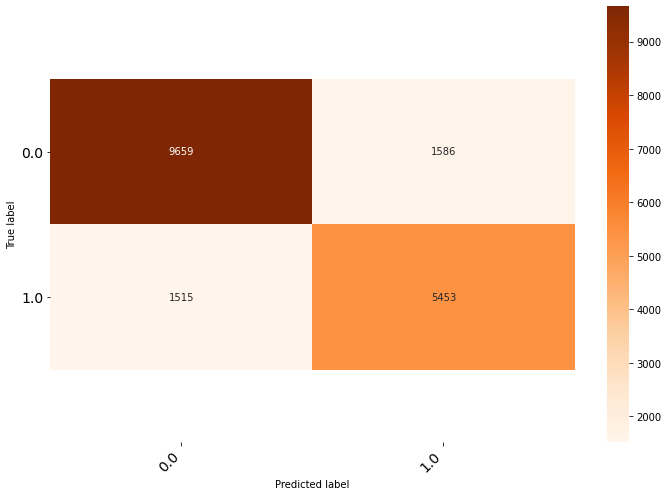

Random Forest Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     11245
         1.0       0.85      0.81      0.83      6968

    accuracy                           0.87     18213
   macro avg       0.87      0.86      0.86     18213
weighted avg       0.87      0.87      0.87     18213



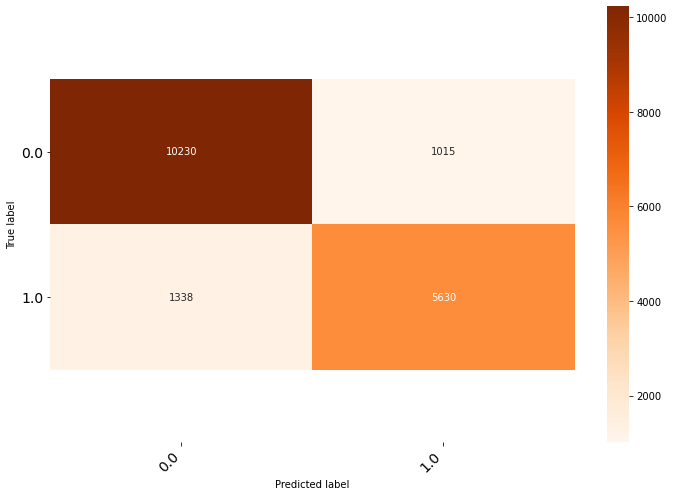

LGBM Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     11245
         1.0       0.87      0.80      0.84      6968

    accuracy                           0.88     18213
   macro avg       0.88      0.86      0.87     18213
weighted avg       0.88      0.88      0.88     18213



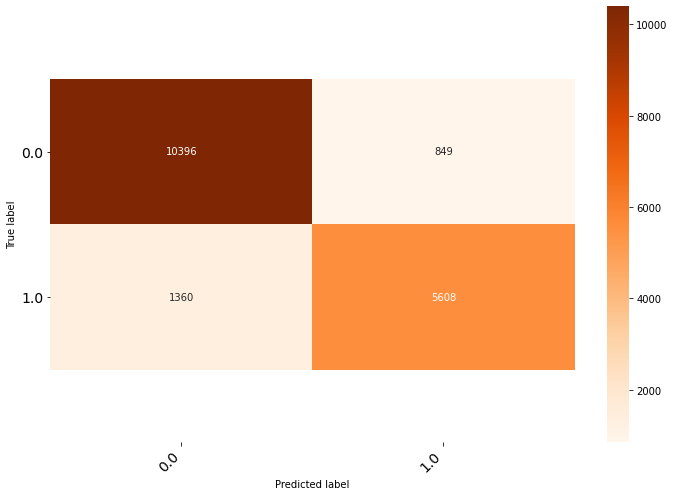

XGB Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     11245
         1.0       0.84      0.80      0.82      6968

    accuracy                           0.86     18213
   macro avg       0.86      0.85      0.85     18213
weighted avg       0.86      0.86      0.86     18213



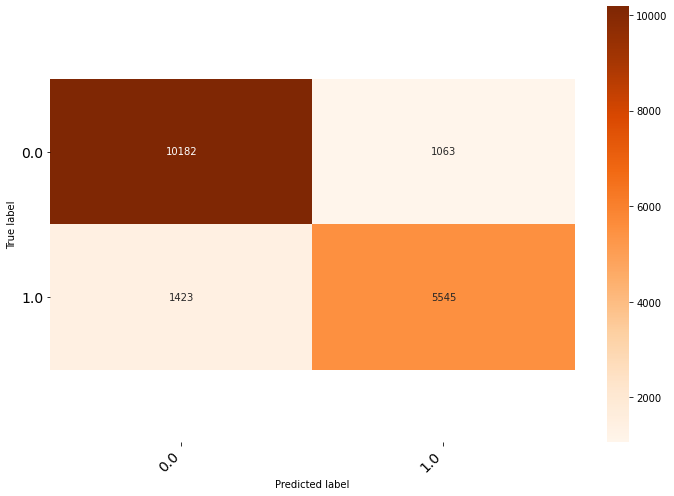

MLP Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11245
         1.0       0.91      0.77      0.83      6968

    accuracy                           0.88     18213
   macro avg       0.89      0.86      0.87     18213
weighted avg       0.88      0.88      0.88     18213



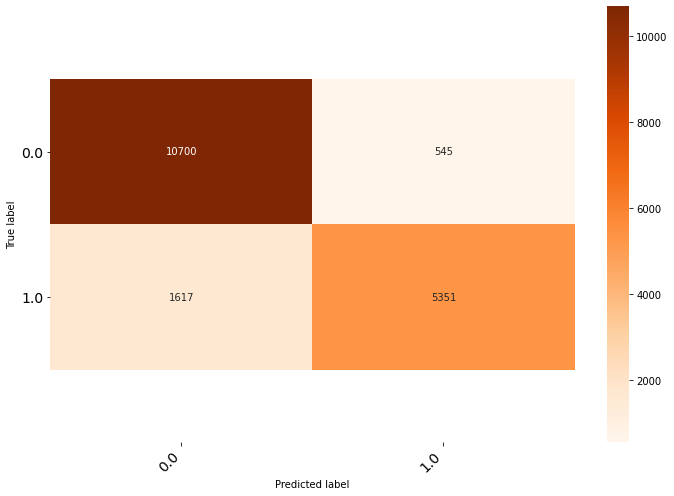

K-Nearest Neighbors

Test Stats
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     11245
         1.0       0.82      0.78      0.80      6968

    accuracy                           0.85     18213
   macro avg       0.85      0.84      0.84     18213
weighted avg       0.85      0.85      0.85     18213



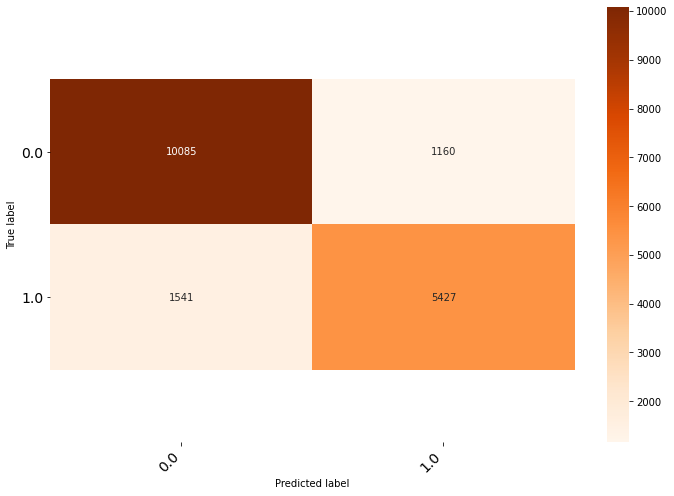

Logistic Regression

Test Stats
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     11245
         1.0       0.83      0.78      0.80      6968

    accuracy                           0.85     18213
   macro avg       0.85      0.84      0.84     18213
weighted avg       0.85      0.85      0.85     18213



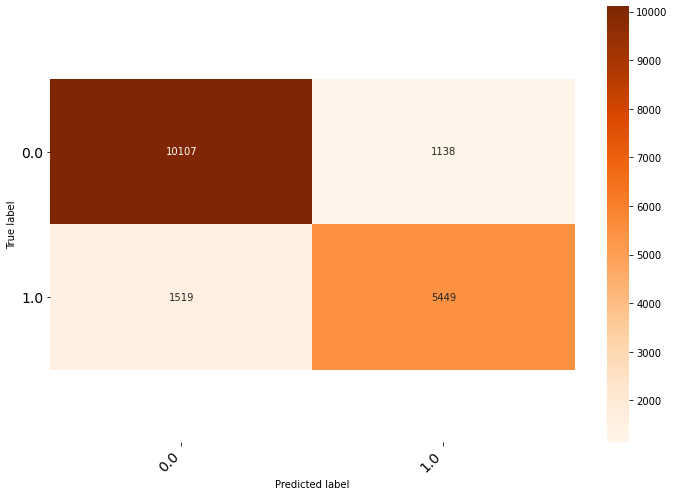

Voting Classifier: MLP, LGB

Test Stats
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91     11245
         1.0       0.87      0.82      0.84      6968

    accuracy                           0.88     18213
   macro avg       0.88      0.87      0.88     18213
weighted avg       0.88      0.88      0.88     18213



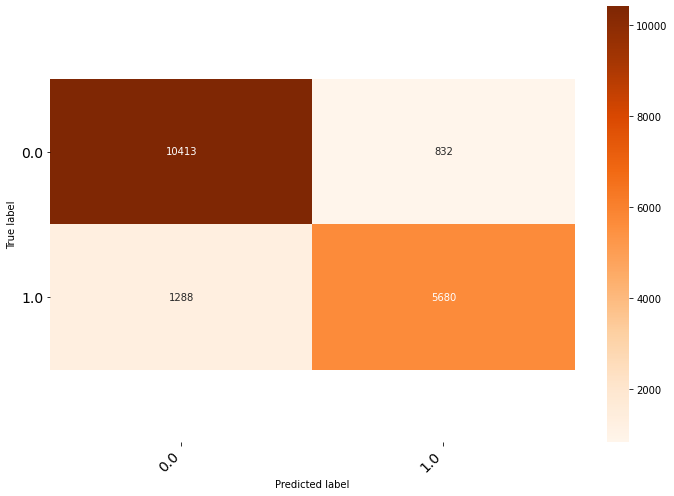

Voting Classifier 2: KNN, XGB, MLP

Test Stats
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     11245
         1.0       0.86      0.81      0.83      6968

    accuracy                           0.88     18213
   macro avg       0.87      0.86      0.87     18213
weighted avg       0.87      0.88      0.87     18213



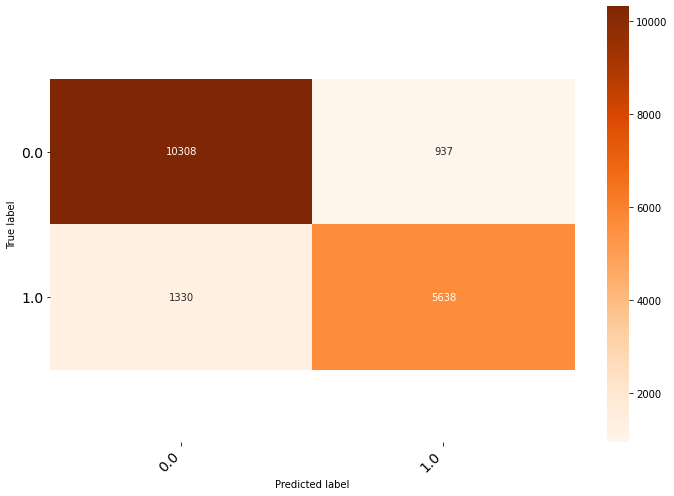

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Voting Classifier 3: XGB, MLP, RF, LR

Test Stats
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     11245
         1.0       0.86      0.80      0.83      6968

    accuracy                           0.87     18213
   macro avg       0.87      0.86      0.86     18213
weighted avg       0.87      0.87      0.87     18213



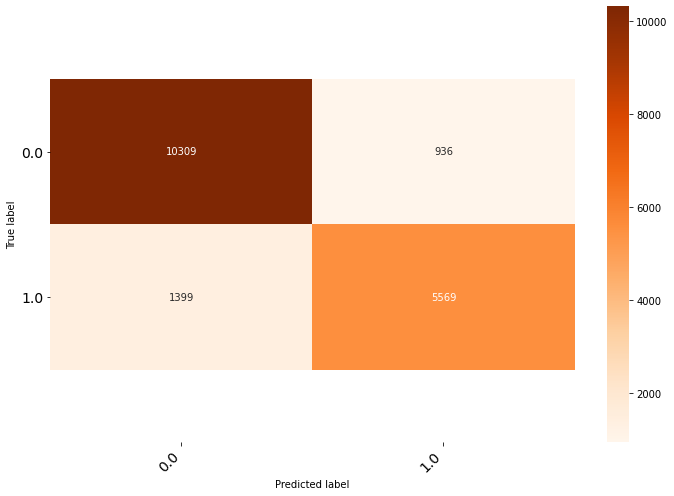

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Voting Classifier 4: MLP, XGB

Test Stats
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     11245
         1.0       0.87      0.80      0.83      6968

    accuracy                           0.88     18213
   macro avg       0.87      0.86      0.87     18213
weighted avg       0.88      0.88      0.88     18213



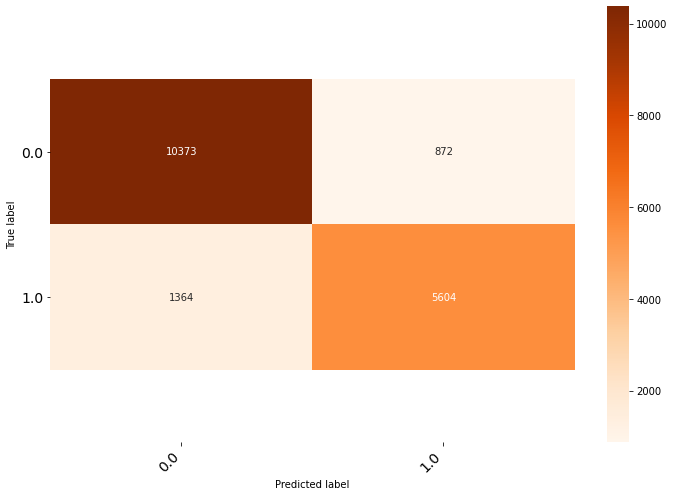

In [ ]:
for key in models.keys():
    model(key, inc_train=False)

### But 2: Predire si un vol sera annulé ou non

In [ ]:
#split into training and testing data sets
y=dataset['CANCELLED']
X = dataset.loc[:, dataset.columns != 'ARR_DEL15']
X = X.loc[:, X.columns != 'CANCELLED']
X = X.loc[:, X.columns != 'ARR_TIME']
X = X.loc[:, X.columns !='DEP_TIME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
list(X)

['DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'DEP_DEL15',
 'CRS_ARR_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'WEATHER_DELAY',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX']

In [ ]:
#Data scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelisation

### CV 10 Fold Accuracy

In [ ]:
for key in models.keys():
    model(key, cv=True, print_stat=False)

Decision Tree Classifier CV Accuracy: 0.9933403347500448
Random Forest Classifier CV Accuracy: 0.994775844835463
LGBM Classifier CV Accuracy: 0.9953406005565324
XGB Classifier CV Accuracy: 0.9945170434565919
MLP Classifier CV Accuracy: 0.9939052344496284
K-Nearest Neighbors CV Accuracy: 0.9775032907396894
Logistic Regression CV Accuracy: 0.9691963894618804
Voting Classifier: MLP, LGB CV Accuracy: 0.9953406227070729
Voting Classifier 2: KNN, XGB, MLP CV Accuracy: 0.9939522600473468
Voting Classifier 3: XGB, MLP, RF, LR CV Accuracy: 0.9945640912048509
Voting Classifier 4: MLP, XGB CV Accuracy: 0.9946817659518503


Decision Tree Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.90      0.92      0.91       702

    accuracy                           0.99     18213
   macro avg       0.95      0.96      0.95     18213
weighted avg       0.99      0.99      0.99     18213



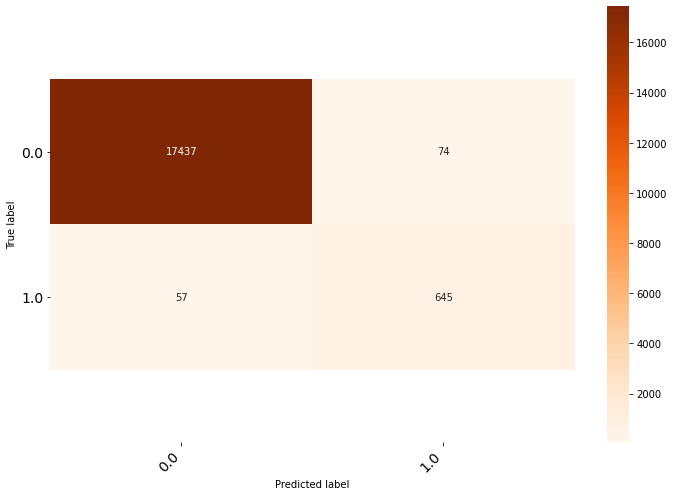

Random Forest Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.91      0.96      0.93       702

    accuracy                           0.99     18213
   macro avg       0.95      0.98      0.96     18213
weighted avg       0.99      0.99      0.99     18213



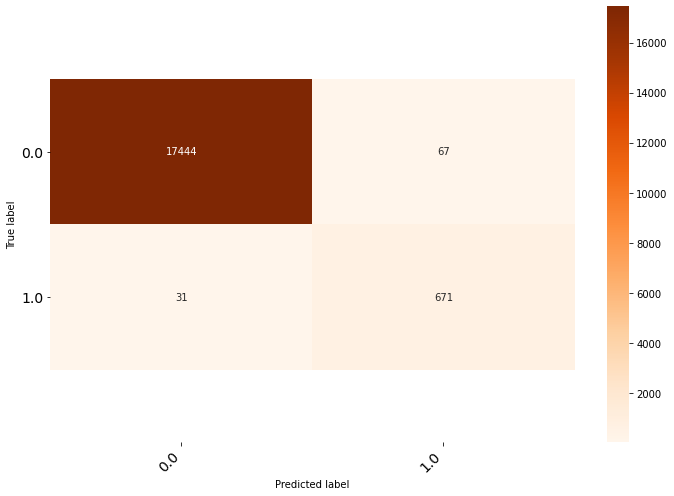

LGBM Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.90      0.97      0.93       702

    accuracy                           0.99     18213
   macro avg       0.95      0.98      0.96     18213
weighted avg       0.99      0.99      0.99     18213



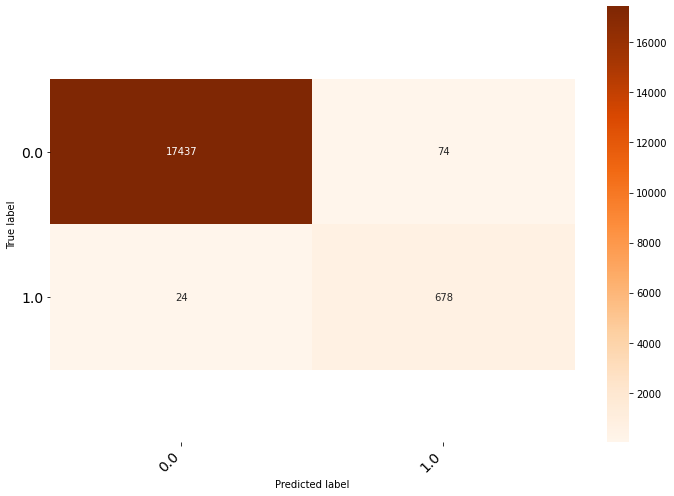

XGB Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17511
         1.0       0.88      0.98      0.93       702

    accuracy                           0.99     18213
   macro avg       0.94      0.99      0.96     18213
weighted avg       0.99      0.99      0.99     18213



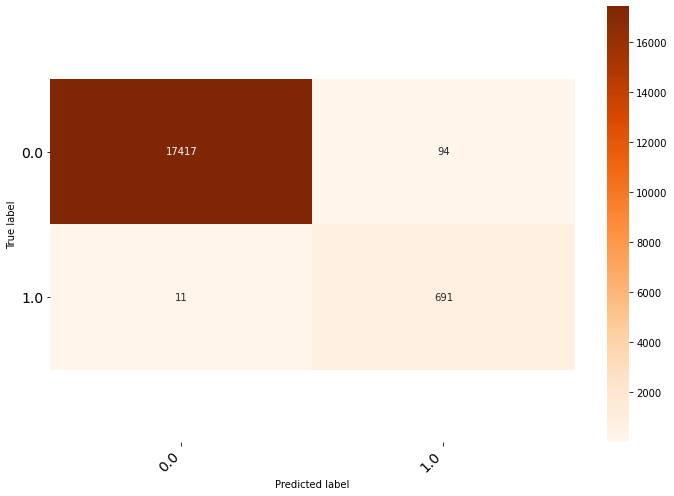

MLP Classifier

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17511
         1.0       0.88      0.97      0.93       702

    accuracy                           0.99     18213
   macro avg       0.94      0.98      0.96     18213
weighted avg       0.99      0.99      0.99     18213



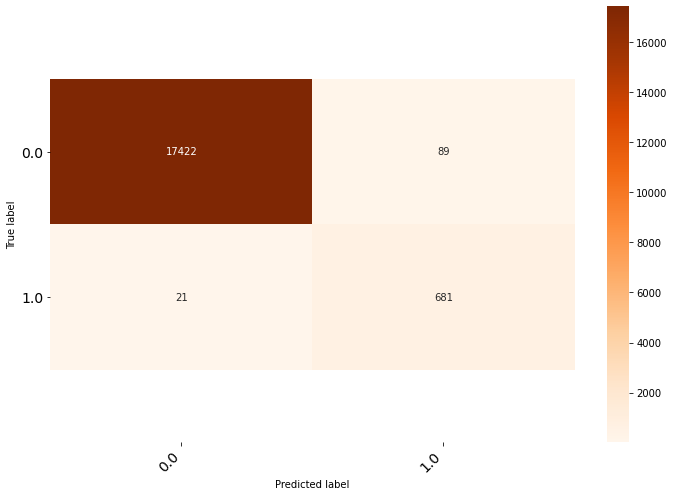

K-Nearest Neighbors

Test Stats
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     17511
         1.0       0.84      0.62      0.71       702

    accuracy                           0.98     18213
   macro avg       0.91      0.81      0.85     18213
weighted avg       0.98      0.98      0.98     18213



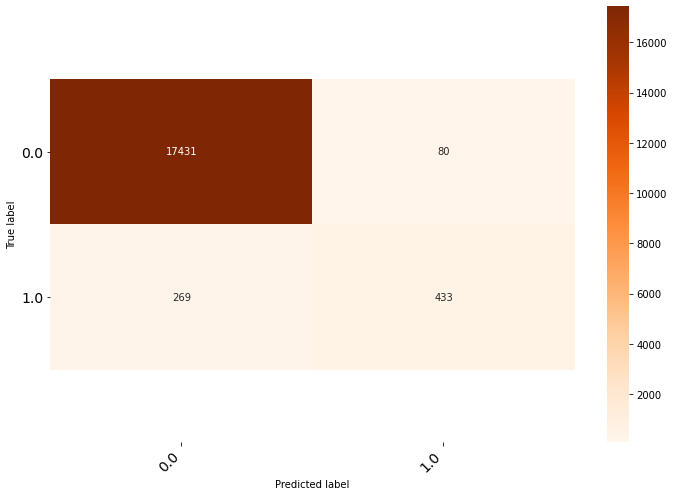

Logistic Regression

Test Stats
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     17511
         1.0       0.96      0.27      0.42       702

    accuracy                           0.97     18213
   macro avg       0.97      0.64      0.70     18213
weighted avg       0.97      0.97      0.96     18213



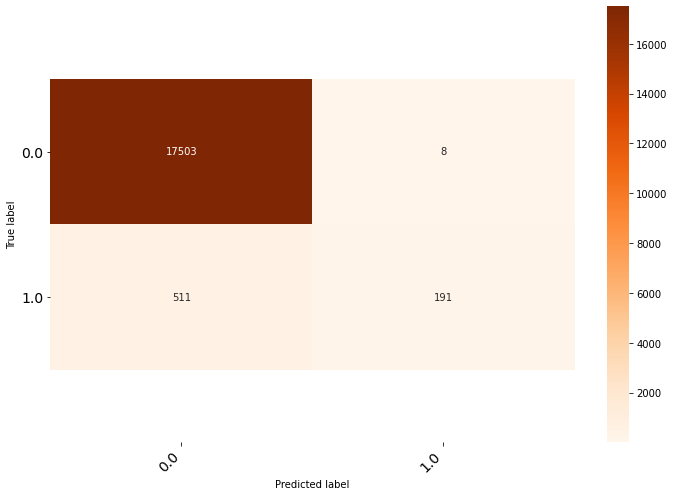

Voting Classifier: MLP, LGB

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.91      0.97      0.94       702

    accuracy                           1.00     18213
   macro avg       0.96      0.98      0.97     18213
weighted avg       1.00      1.00      1.00     18213



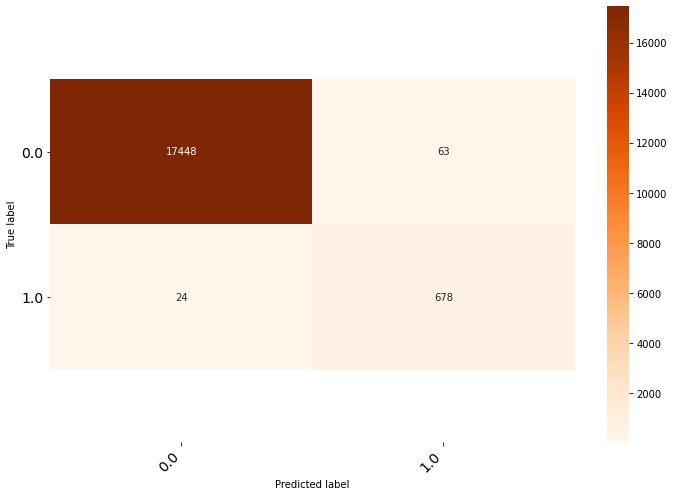

Voting Classifier 2: KNN, XGB, MLP

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.93      0.90      0.91       702

    accuracy                           0.99     18213
   macro avg       0.96      0.95      0.96     18213
weighted avg       0.99      0.99      0.99     18213



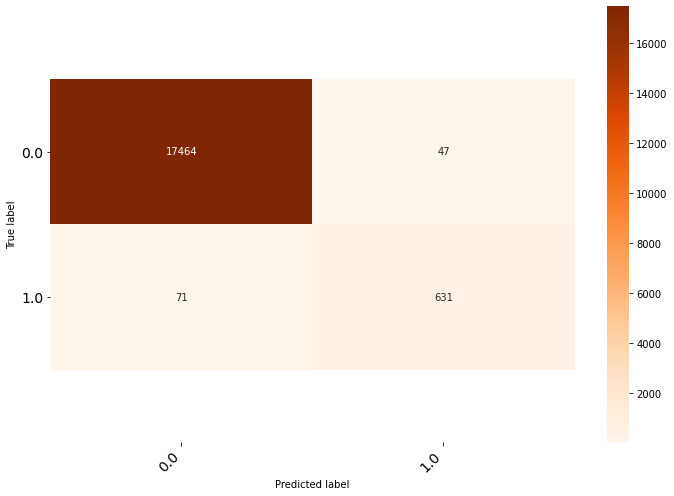

Voting Classifier 3: XGB, MLP, RF, LR

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.93      0.92      0.93       702

    accuracy                           0.99     18213
   macro avg       0.97      0.96      0.96     18213
weighted avg       0.99      0.99      0.99     18213



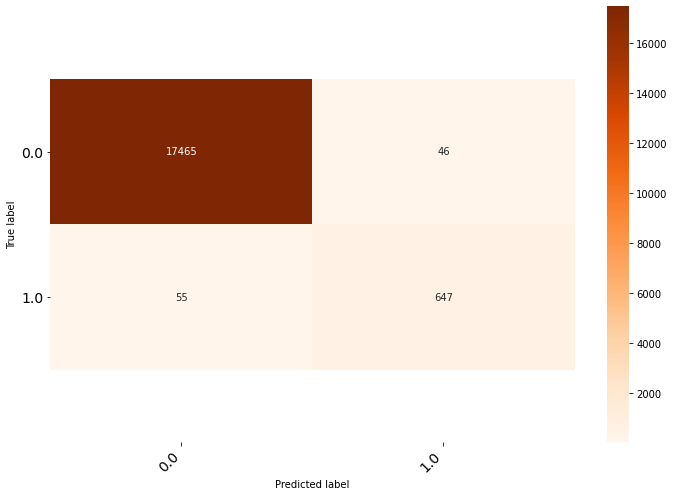

Voting Classifier 4: MLP, XGB

Test Stats
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17511
         1.0       0.89      0.97      0.93       702

    accuracy                           0.99     18213
   macro avg       0.95      0.98      0.96     18213
weighted avg       0.99      0.99      0.99     18213



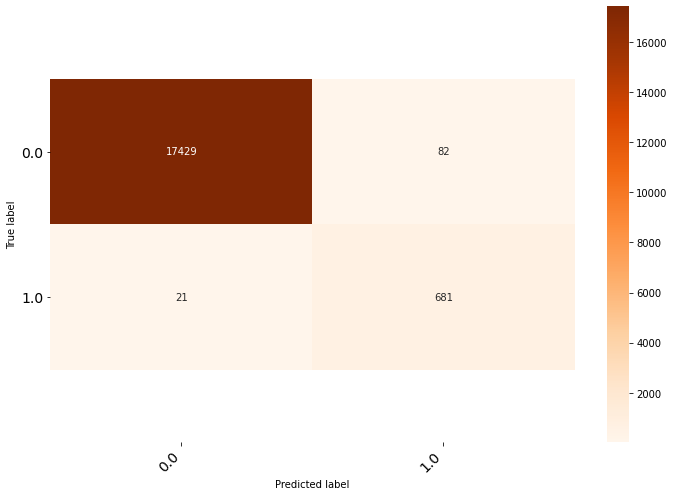

In [ ]:
for key in models.keys():
    model(key, inc_train=False)

### But 3: Predire le temps d'arrivée reelle



In [ ]:
#split into training and testing data sets
y=dataset['ARR_TIME']
X = dataset.loc[:, dataset.columns != 'ARR_TIME']
X = X.loc[:, X.columns != 'CANCELLED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
list(X)

['DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DEL15',
 'CRS_ARR_TIME',
 'ARR_DEL15',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'WEATHER_DELAY',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)

In [ ]:
r_sq

0.6036473627146512

###But 4 : Predire la date réelle de depart 




In [ ]:
y=dataset['DEP_TIME']
X = dataset.loc[:, dataset.columns != 'ARR_DEL15']
X = X.loc[:, X.columns != 'CANCELLED']
X = X.loc[:, X.columns != 'DEP_TIME']
X = X.loc[:, X.columns != 'ARR_TIME']
X = X.loc[:, X.columns != 'CRS_ARR_TIME']
X = X.loc[:, X.columns != 'DISTANCE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
list(X)

['DAY_OF_WEEK',
 'CRS_DEP_TIME',
 'DEP_DEL15',
 'AIR_TIME',
 'FLIGHTS',
 'WEATHER_DELAY',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX']

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)

In [ ]:
r_sq

0.9055866051033682